In [2]:
import sys
sys.path.append("../src/models")
sys.path.append("../src")

In [3]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import warnings
warnings.filterwarnings("ignore")

In [4]:
from model_comparison import *

In [21]:
# RF results
results_dict2_wf_ori = joblib.load("../../data/Intermediate/results_dict2_binary_ori.pkl")
results_dict2_wf_log = joblib.load("../../data/Intermediate/results_dict2_RF_clean.pkl")
results_dict2_wf_mf = joblib.load("../../data/Intermediate/results_dict2.pkl")

results_dict3_wf_ori = joblib.load("../../data/Intermediate/results_dict3_amphiphile_ori.pkl")
results_dict3_wf_log = joblib.load("../../data/Intermediate/results_dict3_RF_clean.pkl")
results_dict3_wf_mf = joblib.load("../../data/Intermediate/results_dict3_amphiphile_mf.pkl")

In [7]:
# NN results
results_dict2_wf_ori_NN = joblib.load("../../data/Intermediate/NN_classification_results_binary_val_wf_ori.joblib")
results_dict2_wf_log_NN = joblib.load("../../data/Intermediate/NN_classification_results_binary_val.joblib")
results_dict2_wf_mf_NN = joblib.load("../../data/Intermediate/NN_classification_results_binary_val_wf_mf.joblib")

results_dict3_wf_ori_NN = joblib.load("../../data/Intermediate/NN_classification_results_amphiphiles_val_wf_ori.joblib")
results_dict3_wf_log_NN = joblib.load("../../data/Intermediate/NN_classification_results_amphiphiles_val.joblib")
results_dict3_wf_mf_NN = joblib.load("../../data/Intermediate/NN_classification_results_amphiphiles_val_wf_mf.joblib")

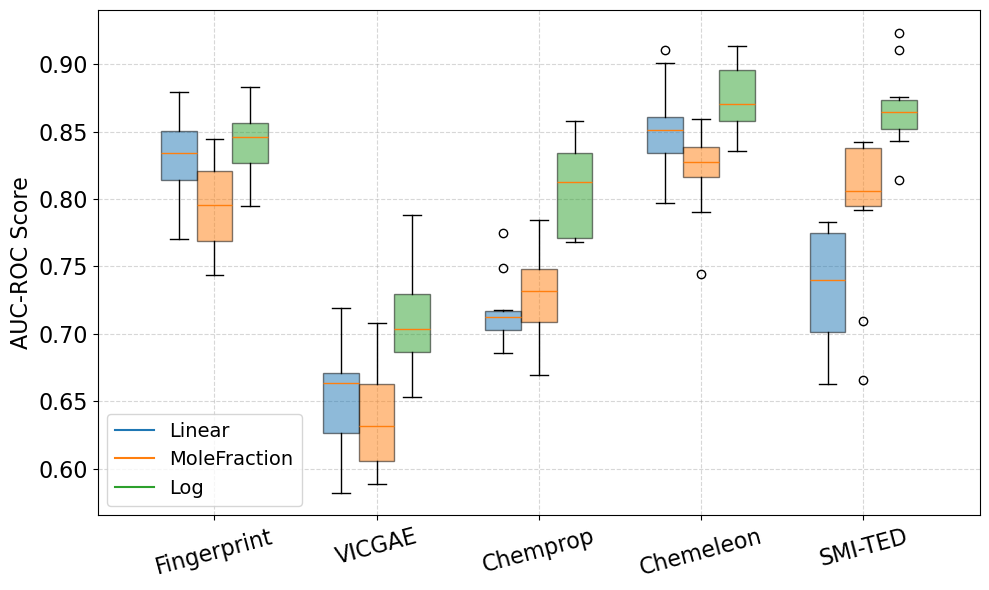

In [17]:
# For binary data

results_ori = joblib.load("../../data/Intermediate/NN_classification_results_binary_val_wf_ori.joblib")
results_log = joblib.load("../../data/Intermediate/NN_classification_results_binary_val.joblib")
results_mf  = joblib.load("../../data/Intermediate/NN_classification_results_binary_val_wf_mf.joblib")

model_type = ['Fingerprint', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']
trans_names = ["Linear", "MoleFraction", "Log"]

# Colors for each transform group
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"] 

auc_ori = [results_ori['roc_auc_results'][m] for m in model_type]
auc_log = [results_log['roc_auc_results'][m] for m in model_type]
auc_mf  = [results_mf['roc_auc_results'][m] for m in model_type]

all_auc = [auc_ori, auc_mf, auc_log]   

plt.figure(figsize=(10, 6))

num_models = len(model_type)
num_groups = len(all_auc)    
box_width = 0.22            
positions = np.arange(num_models)

for i in range(num_groups):
    box_pos = positions + (i - 1) * box_width   
    bp = plt.boxplot(
        all_auc[i],
        positions=box_pos,
        widths=box_width,
        patch_artist=True,
        labels=[None]*num_models  
    )
    
    # Color the boxes
    for patch in bp['boxes']:
        patch.set_facecolor(colors[i])
        patch.set_alpha(0.5)

plt.xticks(positions, model_type, fontsize=16, rotation=15)
plt.ylabel("AUC-ROC Score", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.yticks(fontsize=16)

for i, name in enumerate(trans_names):
    plt.plot([], color=colors[i], label=name)
plt.legend(fontsize=14)

plt.tight_layout()

plt.savefig("../../results/model_performance_weight_function_NN_binary.png", dpi=600, bbox_inches="tight")

plt.show()

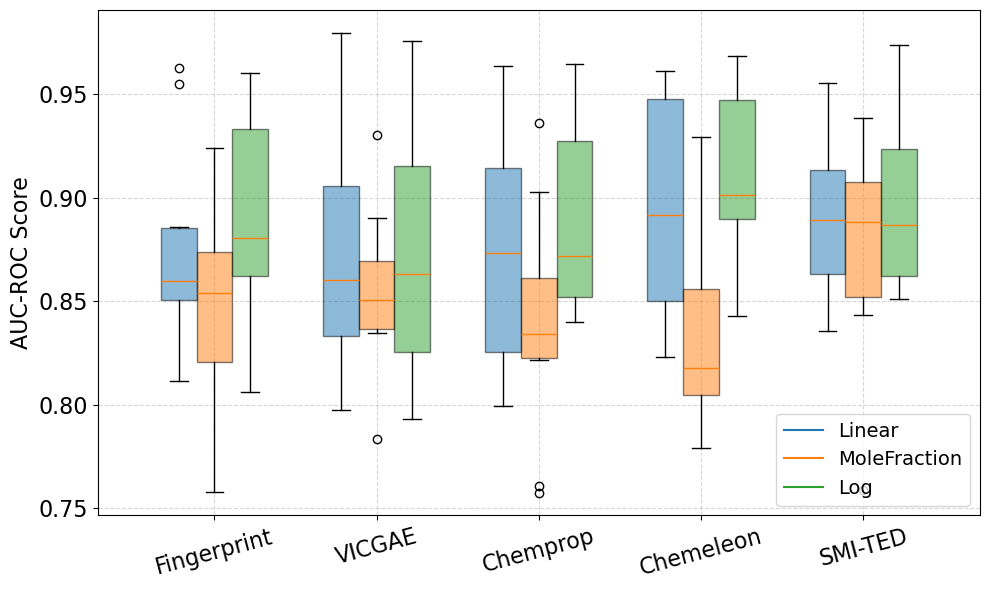

In [19]:
#For amphiphile data

results_ori = joblib.load("../../data/Intermediate/NN_classification_results_amphiphiles_val_wf_ori.joblib")
results_log = joblib.load("../../data/Intermediate/NN_classification_results_amphiphiles_val.joblib")
results_mf = joblib.load("../../data/Intermediate/NN_classification_results_amphiphiles_val_wf_mf.joblib")


model_type = ['Fingerprint', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']
trans_names = ["Linear", "MoleFraction", "Log"]

# Colors for each transform group
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"] 

auc_ori = [results_ori['roc_auc_results'][m] for m in model_type]
auc_log = [results_log['roc_auc_results'][m] for m in model_type]
auc_mf  = [results_mf['roc_auc_results'][m] for m in model_type]

all_auc = [auc_ori, auc_mf, auc_log]   

plt.figure(figsize=(10, 6))

num_models = len(model_type)
num_groups = len(all_auc)    
box_width = 0.22             
positions = np.arange(num_models)

for i in range(num_groups):
    box_pos = positions + (i - 1) * box_width  
    bp = plt.boxplot(
        all_auc[i],
        positions=box_pos,
        widths=box_width,
        patch_artist=True,
        labels=[None]*num_models 
    )
    
    # Color the boxes
    for patch in bp['boxes']:
        patch.set_facecolor(colors[i])
        patch.set_alpha(0.5)

plt.xticks(positions, model_type, fontsize=16, rotation=15)
plt.ylabel("AUC-ROC Score", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.yticks(fontsize=16)

for i, name in enumerate(trans_names):
    plt.plot([], color=colors[i], label=name)
plt.legend(fontsize=14)

plt.tight_layout()

plt.savefig("../../results/model_performance_weight_function_NN_amphiphile.png", dpi=600, bbox_inches="tight")

plt.show()